In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#  Load the data

df = pd.read_csv(r"D:\MachineLearningLibraries\Netflix_Project\netflix_titles.csv")

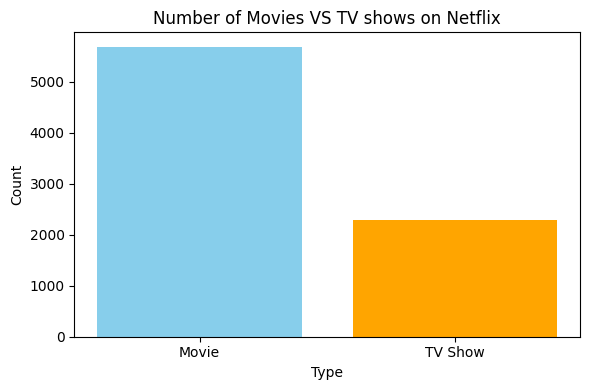

In [5]:
# clean data
df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color = ['skyblue', 'orange'])
plt.title("Number of Movies VS TV shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

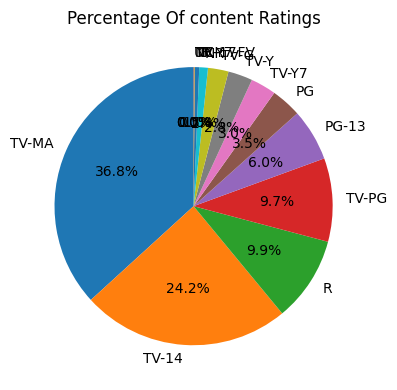

In [6]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(rating_counts, labels = rating_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title("Percentage Of content Ratings")
plt.tight_layout()
plt.savefig('Content_Ratings_pie.png')
plt.show()


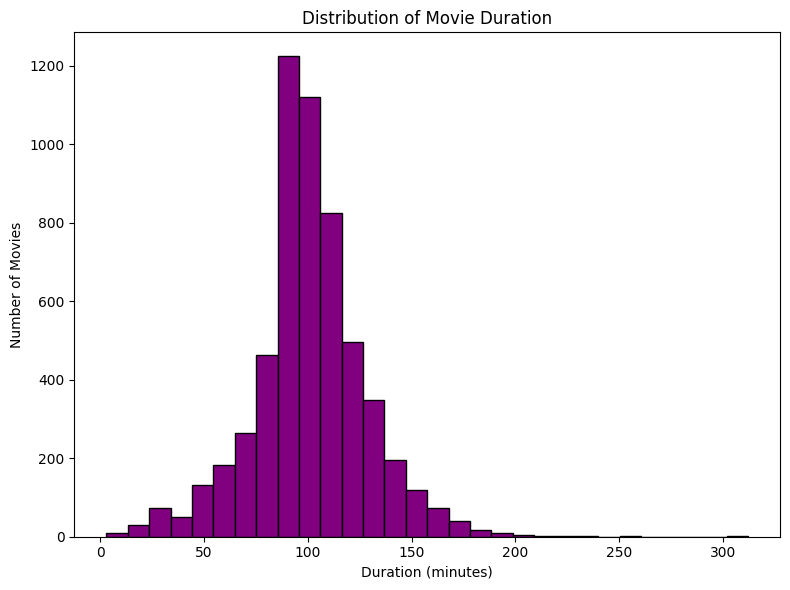

In [ ]:
#  Histogram 

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins = 30, color = 'purple', edgecolor = 'black')
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig('Movie_duration_Histogram.png')
plt.show()


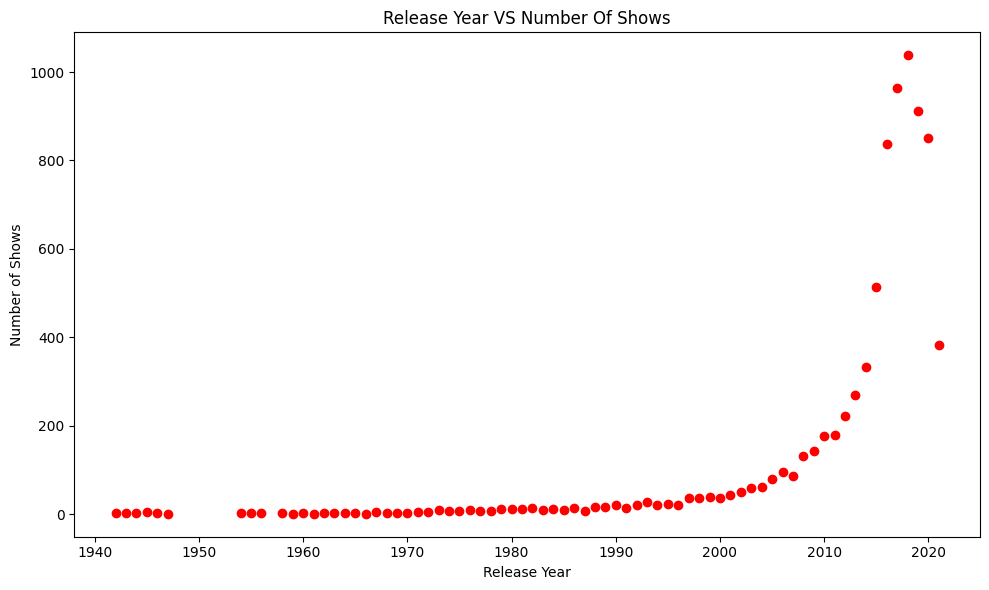

In [13]:
#  Scatter Plot

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize =(10, 6))
plt.scatter(release_counts.index, release_counts.values, color = 'red' )
plt.title("Release Year VS Number Of Shows")
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig('Release_year_scatter.png')
plt.show()


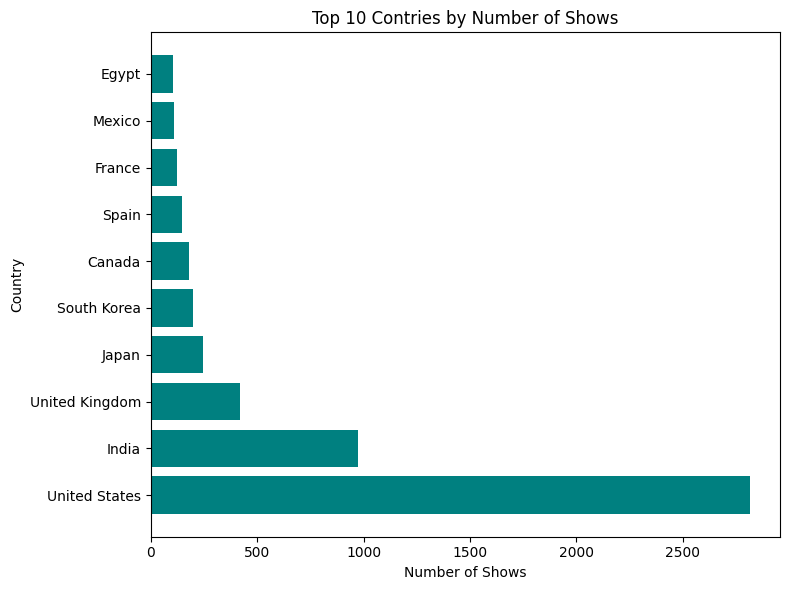

In [15]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color = 'teal' )
plt.title("Top 10 Contries by Number of Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('top10_contries.png')
plt.show()


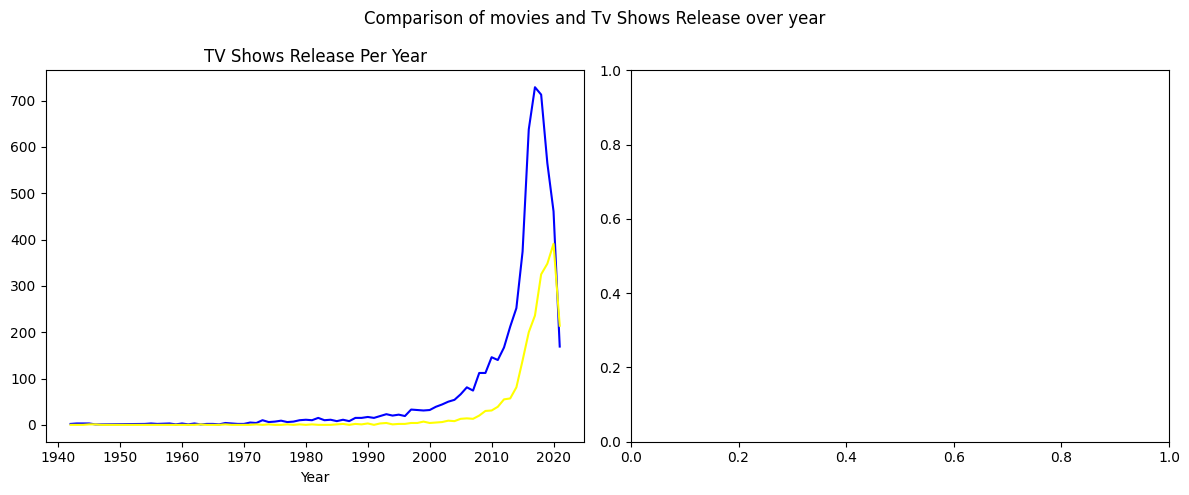

In [20]:
#  Subplots Movie Vs TV shows by year 

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

# First Subplot : movies()
ax[0].plot(content_by_year.index, content_by_year['Movie'], color = 'blue')
ax[0].set_title('Movies Release Per Year')
ax[0].set_xlabel('Year')
ax[0].set_label("Number of Movies")

#  Second Subplot: TVShow()
ax[0].plot(content_by_year.index, content_by_year['TV Show'], color = 'yellow')
ax[0].set_title('TV Shows Release Per Year')
ax[0].set_xlabel('Year')
ax[0].set_label("Number of TV Shows")

fig.suptitle('Comparison of movies and Tv Shows Release over year')
plt.tight_layout()
plt.savefig('Movies_Tv_Show_comp.png')